In this notebook, I shall be simulating some appliance data to see how well we are able to find the change points.

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [165]:

noise_sigma=0.04
test_signal =  np.concatenate((np.random.normal(1, noise_sigma,250),
                        np.linspace(1,0,50) + np.random.normal(0,noise_sigma,50),
                   np.random.normal(0,noise_sigma,250),
                        np.linspace(0,4,200)+ np.random.normal(0,noise_sigma,200),

                   np.random.normal(4,noise_sigma,400),
                              np.random.normal(2,noise_sigma,400)))

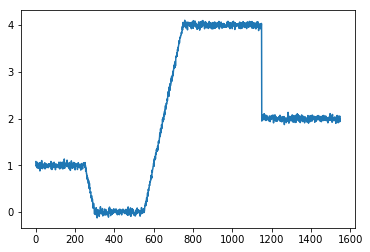

In [166]:
plt.plot(test_signal);

In [167]:
from bayesianchangepoint import bcp

In [168]:
hazard_func = lambda r: bcp.constant_hazard(r, _lambda=2000)

In [169]:
beliefs, maxes = bcp.inference(test_signal, hazard_func)

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


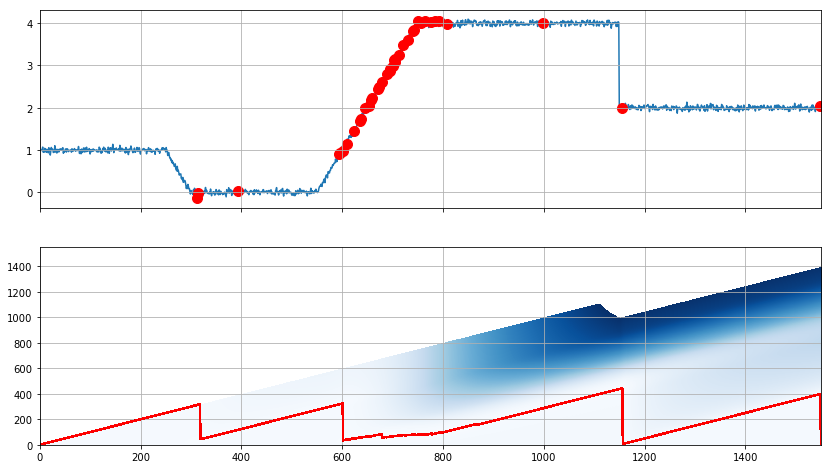

In [170]:
fig, ax = plt.subplots(nrows = 2, sharex = True)
fig.set_size_inches(w=14, h=8)

ax[0].grid()
ax[0].scatter(index_changes, test_signal[index_changes], c='r', s=100, zorder=1);
ax[0].plot(test_signal, zorder=0)

ax[1].imshow(-np.log(beliefs), interpolation='none', aspect='auto',
               origin='lower', cmap=plt.cm.Blues)
ax[1].plot(maxes, color='r')
ax[1].set_xlim([0, len(test_signal)])
ax[1].set_ylim([0, ax[1].get_ylim()[1]])
ax[1].grid()
index_changes = np.where(np.diff(maxes.T[0])<0)[0]




Looks decent! I am not very sure about why maxes is same for all index positions. I just used maxes[0] for marking the change points. This needs confirmation though.